In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('TaxiFare.csv')

In [5]:
df.head()

unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1   52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2   35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3   30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4   51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  
0                1  
1                1  
2                2  
3                1  
4                1

In [171]:
df.shape

(50000, 8)

In [172]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [173]:
df.columns = df.columns.str.replace('"', '')

In [174]:
mixed_cols = ['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger']

df[mixed_cols] = df[mixed_cols].applymap(lambda x: x.strip('"') if isinstance(x, str) else x)

In [175]:
df[mixed_cols]

unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0       26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1       52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2       35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3       30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4       51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   
...         ...     ...                      ...                  ...   
49995   25:15.0    15.0  2013-06-12 23:25:15 UTC           -73.999973   
49996   19:18.0     7.5  2015-06-22 17:19:18 UTC           -73.984756   
49997   53:00.0     6.9  2011-01-30 04:53:00 UTC           -74.002698   
49998   09:00.0     4.5  2012-11-06 07:09:00 UTC           -73.946062   
49999   13:14.0    10.9  2010-01-13 08:13:14 UTC           -73.932603   

       latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0               40.721319            -73.841610            40.712278   
1               40.711303            -73.979268            40.782004   
2               40.761270            -73.991242            40.750562   
3               40.733143            -73.991567            40.758092   
4               40.768008            -73.956655            40.783762   
...                   ...                   ...                  ...   
49995           40.748531            -74.016899            40.705993   
49996           40.768211            -73.987366            40.760597   
49997           40.739428            -73.998108            40.759483   
49998           40.777567            -73.953450            40.779687   
49999           40.763805            -73.932603            40.763805   

       no_of_passenger  
0                    1  
1                    1  
2                    2  
3                    1  
4                    1  
...                ...  
49995                1  
49996                1  
49997                1  
49998                2  
49999                1  

[50000 rows x 8 columns]

In [176]:
numeric_cols = ['amount', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [177]:
df[numeric_cols]

amount  longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  \
0         4.5           -73.844311           40.721319            -73.841610   
1        16.9           -74.016048           40.711303            -73.979268   
2         5.7           -73.982738           40.761270            -73.991242   
3         7.7           -73.987130           40.733143            -73.991567   
4         5.3           -73.968095           40.768008            -73.956655   
...       ...                  ...                 ...                   ...   
49995    15.0           -73.999973           40.748531            -74.016899   
49996     7.5           -73.984756           40.768211            -73.987366   
49997     6.9           -74.002698           40.739428            -73.998108   
49998     4.5           -73.946062           40.777567            -73.953450   
49999    10.9           -73.932603           40.763805            -73.932603   

       latitude_of_dropoff  no_of_passenger  
0                40.712278                1  
1                40.782004                1  
2                40.750562                2  
3                40.758092                1  
4                40.783762                1  
...                    ...              ...  
49995            40.705993                1  
49996            40.760597                1  
49997            40.759483                1  
49998            40.779687                2  
49999            40.763805                1  

[50000 rows x 6 columns]

In [178]:
print(df['no_of_passenger'].unique())

[1 2 3 6 5 4 0]


In [179]:
#print value count of no of passenger
print(df['no_of_passenger'].value_counts())

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64


In [180]:
#drop rows with no of passenger > 6
df = df[df['no_of_passenger'] <= 6]

In [181]:
#drop rows with no of passenger < 1
df = df[df['no_of_passenger'] >= 1]

C:\Users\hrsha\AppData\Local\Temp\ipykernel_19556\2409801649.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


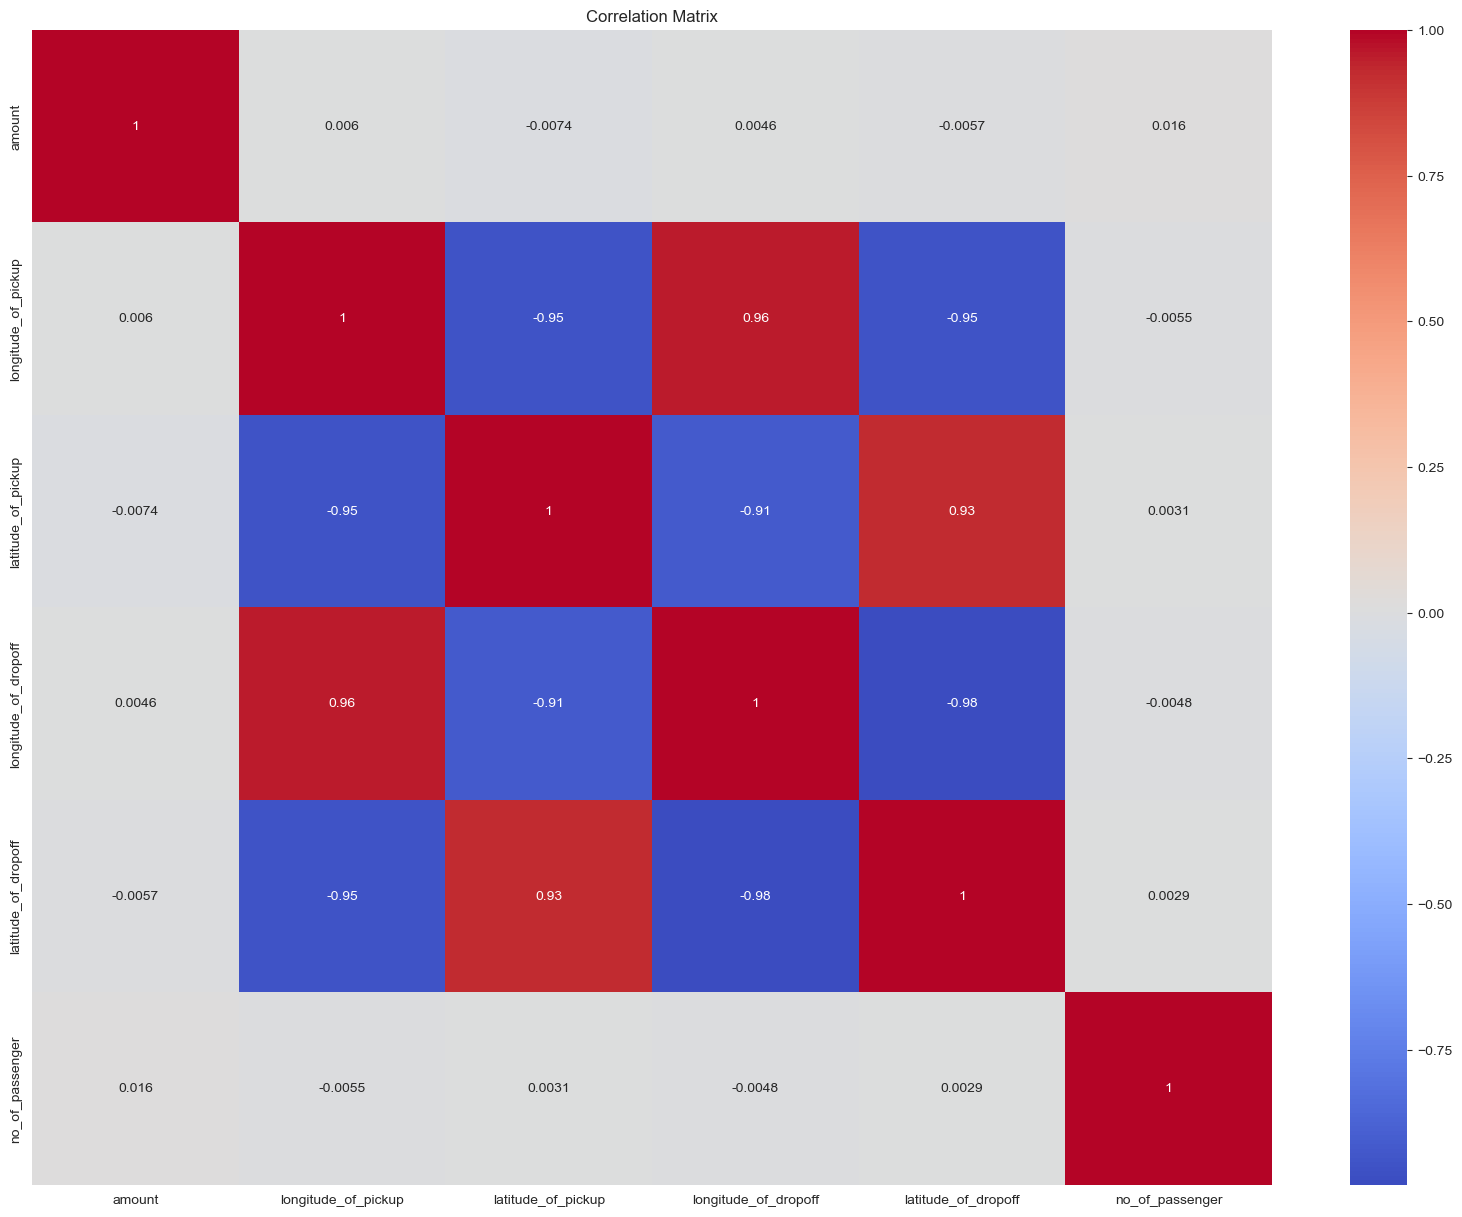

In [182]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

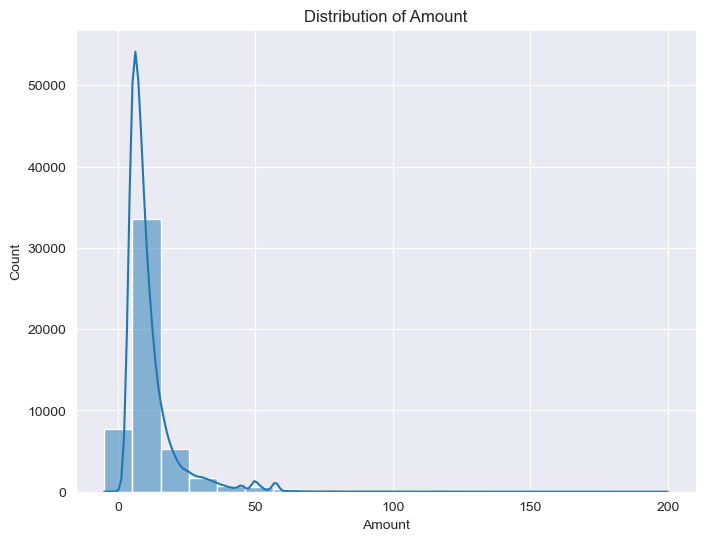

In [183]:
plt.figure(figsize=(8, 6))
sns.histplot(df['amount'], bins=20, kde=True)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Distribution of Amount')
plt.show()

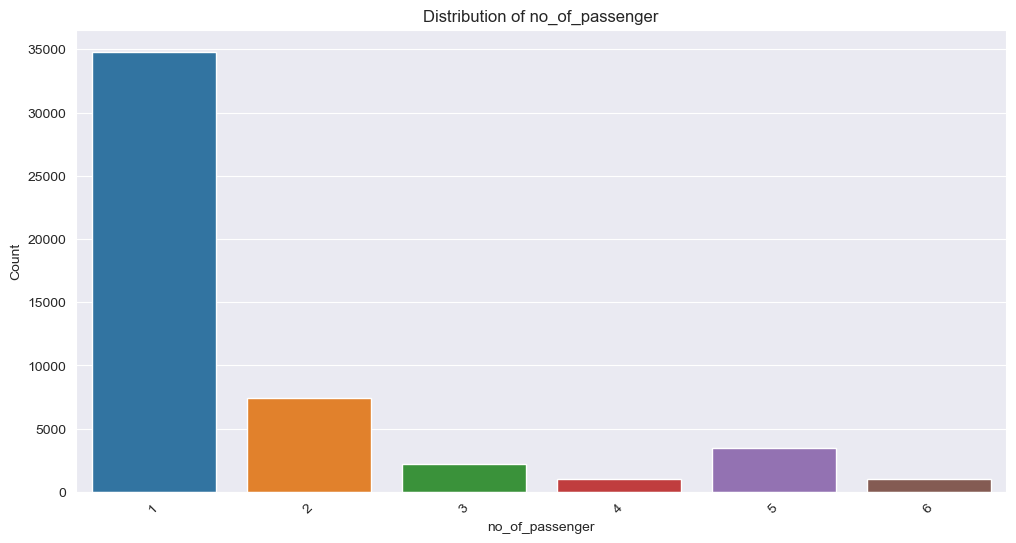

In [184]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='no_of_passenger')
plt.xlabel('no_of_passenger')
plt.ylabel('Count')
plt.title('Distribution of no_of_passenger')
plt.xticks(rotation=45)
plt.show()

In [185]:
categorical_features = ['unique_id','date_time_of_pickup']


In [186]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

In [187]:
df['year'] = df['date_time_of_pickup'].dt.year

In [188]:
df['month'] = df['date_time_of_pickup'].dt.month

In [189]:
df['day'] = df['date_time_of_pickup'].dt.day

In [190]:
df['hour'] = df['date_time_of_pickup'].dt.hour

In [191]:
df['minute'] = df['date_time_of_pickup'].dt.minute


In [192]:
df['day_of_week'] = df['date_time_of_pickup'].dt.dayofweek

In [193]:
df['day_of_week'] = df['day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                           4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

In [194]:
df['day_of_week'].value_counts()

Friday       7638
Saturday     7607
Thursday     7382
Wednesday    7185
Tuesday      6902
Monday       6622
Sunday       6499
Name: day_of_week, dtype: int64

In [195]:
df.head()

unique_id  amount       date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5 2009-06-15 17:26:21+00:00           -73.844311   
1   52:16.0    16.9 2010-01-05 16:52:16+00:00           -74.016048   
2   35:00.0     5.7 2011-08-18 00:35:00+00:00           -73.982738   
3   30:42.0     7.7 2012-04-21 04:30:42+00:00           -73.987130   
4   51:00.0     5.3 2010-03-09 07:51:00+00:00           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  year  month  day  hour  minute day_of_week  
0                1  2009      6   15    17      26      Monday  
1                1  2010      1    5    16      52     Tuesday  
2                2  2011      8   18     0      35    Thursday  
3                1  2012      4   21     4      30    Saturday  
4                1  2010      3    9     7      51     Tuesday

In [196]:
missing_values = df.isnull().sum()
missing_values

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
year                    0
month                   0
day                     0
hour                    0
minute                  0
day_of_week             0
dtype: int64

In [197]:
from sklearn.preprocessing import LabelEncoder

In [198]:
categorical_cols = ['unique_id', 'day_of_week']

In [199]:
le = LabelEncoder()

In [200]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [201]:
df.head()

unique_id  amount       date_time_of_pickup  longitude_of_pickup  \
0       1579     4.5 2009-06-15 17:26:21+00:00           -73.844311   
1       3133    16.9 2010-01-05 16:52:16+00:00           -74.016048   
2       2097     5.7 2011-08-18 00:35:00+00:00           -73.982738   
3       1839     7.7 2012-04-21 04:30:42+00:00           -73.987130   
4       3057     5.3 2010-03-09 07:51:00+00:00           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  year  month  day  hour  minute  day_of_week  
0                1  2009      6   15    17      26            1  
1                1  2010      1    5    16      52            5  
2                2  2011      8   18     0      35            4  
3                1  2012      4   21     4      30            2  
4                1  2010      3    9     7      51            5

In [202]:
df.drop(['date_time_of_pickup'], axis=1, inplace=True)

In [203]:
df.head()

unique_id  amount  longitude_of_pickup  latitude_of_pickup  \
0       1579     4.5           -73.844311           40.721319   
1       3133    16.9           -74.016048           40.711303   
2       2097     5.7           -73.982738           40.761270   
3       1839     7.7           -73.987130           40.733143   
4       3057     5.3           -73.968095           40.768008   

   longitude_of_dropoff  latitude_of_dropoff  no_of_passenger  year  month  \
0            -73.841610            40.712278                1  2009      6   
1            -73.979268            40.782004                1  2010      1   
2            -73.991242            40.750562                2  2011      8   
3            -73.991567            40.758092                1  2012      4   
4            -73.956655            40.783762                1  2010      3   

   day  hour  minute  day_of_week  
0   15    17      26            1  
1    5    16      52            5  
2   18     0      35            4  
3   21     4      30            2  
4    9     7      51            5

In [204]:
df.columns

Index(['unique_id', 'amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'year', 'month', 'day', 'hour', 'minute', 'day_of_week'],
      dtype='object')

In [205]:
df = df[['unique_id', 'amount', 'year', 'month', 'day', 'hour', 'minute',
       'day_of_week', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']]

In [206]:
df.head()

unique_id  amount  year  month  day  hour  minute  day_of_week  \
0       1579     4.5  2009      6   15    17      26            1   
1       3133    16.9  2010      1    5    16      52            5   
2       2097     5.7  2011      8   18     0      35            4   
3       1839     7.7  2012      4   21     4      30            2   
4       3057     5.3  2010      3    9     7      51            5   

   longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  \
0           -73.844311           40.721319            -73.841610   
1           -74.016048           40.711303            -73.979268   
2           -73.982738           40.761270            -73.991242   
3           -73.987130           40.733143            -73.991567   
4           -73.968095           40.768008            -73.956655   

   latitude_of_dropoff  no_of_passenger  
0            40.712278                1  
1            40.782004                1  
2            40.750562                2  
3            40.758092                1  
4            40.783762                1

In [207]:
#train the model using random forest
from sklearn.ensemble import RandomForestRegressor


In [208]:
#continue with training
X = df.drop(['amount'], axis=1)
y = df['amount']


In [209]:
#continue with training
rf = RandomForestRegressor()


In [210]:
#continue wiht training
rf.fit(X, y)


RandomForestRegressor()

In [211]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

In [212]:
feature_importances.sort_values(ascending=False)

longitude_of_dropoff    0.390186
longitude_of_pickup     0.228047
latitude_of_dropoff     0.157234
latitude_of_pickup      0.117863
year                    0.023635
hour                    0.016682
day                     0.014732
unique_id               0.014531
month                   0.012896
day_of_week             0.009432
minute                  0.009321
no_of_passenger         0.005441
dtype: float64

In [231]:
#convert latitude and logitude columsn to one column named distance
import numpy as np


In [232]:
#continue
def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2] - df[lat1])
    delta_lambda = np.radians(df[long2] - df[long1])
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c)
    return d

In [233]:
#continue
df['distance'] = haversine_distance(df, 'latitude_of_pickup', 'longitude_of_pickup', 'latitude_of_dropoff', 'longitude_of_dropoff')

In [234]:
#continue
df.head()

unique_id  amount  year  month  day  hour  minute  day_of_week  \
0       1579     4.5  2009      6   15    17      26            1   
1       3133    16.9  2010      1    5    16      52            5   
2       2097     5.7  2011      8   18     0      35            4   
3       1839     7.7  2012      4   21     4      30            2   
4       3057     5.3  2010      3    9     7      51            5   

   longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  \
0           -73.844311           40.721319            -73.841610   
1           -74.016048           40.711303            -73.979268   
2           -73.982738           40.761270            -73.991242   
3           -73.987130           40.733143            -73.991567   
4           -73.968095           40.768008            -73.956655   

   latitude_of_dropoff  no_of_passenger  distance  
0            40.712278                1  1.030764  
1            40.782004                1  8.450134  
2            40.750562                2  1.389525  
3            40.758092                1  2.799270  
4            40.783762                1  1.999157

In [236]:
#drop the latitude and longitude columns
df.drop(['latitude_of_pickup', 'longitude_of_pickup', 'latitude_of_dropoff', 'longitude_of_dropoff'], axis=1, inplace=True)

In [237]:
#now do the formula
#continue
def calculate_fare(df, rate, mta_tax, tip_amount, tolls_amount, improvement_surcharge, extra):
    fare_amount = (df['distance'] * rate) + mta_tax + tip_amount + tolls_amount + improvement_surcharge + extra
    return fare_amount

In [238]:
#continue
df['fare_amount'] = calculate_fare(df, 1.56, 0.50, 1.00, 0.50, 0.30, 1.00)

In [244]:
#contninue
df.head()

unique_id  year  month  day  hour  minute  day_of_week  no_of_passenger  \
0       1579  2009      6   15    17      26            1                1   
1       3133  2010      1    5    16      52            5                1   
2       2097  2011      8   18     0      35            4                2   
3       1839  2012      4   21     4      30            2                1   
4       3057  2010      3    9     7      51            5                1   

   distance  
0  1.030764  
1  8.450134  
2  1.389525  
3  2.799270  
4  1.999157

In [241]:
#drop fare amount
df.drop(['fare_amount'], axis=1, inplace=True)

In [242]:
#split the data into train and test
from sklearn.model_selection import train_test_split


In [250]:
#add amount column in df
df['amount'] = y

In [251]:
df.head()

unique_id  year  month  day  hour  minute  day_of_week  no_of_passenger  \
0       1579  2009      6   15    17      26            1                1   
1       3133  2010      1    5    16      52            5                1   
2       2097  2011      8   18     0      35            4                2   
3       1839  2012      4   21     4      30            2                1   
4       3057  2010      3    9     7      51            5                1   

   distance  amount  
0  1.030764     4.5  
1  8.450134    16.9  
2  1.389525     5.7  
3  2.799270     7.7  
4  1.999157     5.3

In [252]:
#split X and y
X = df.drop(['amount'], axis=1)
y = df['amount']

In [254]:
X.head()

unique_id  year  month  day  hour  minute  day_of_week  no_of_passenger  \
0       1579  2009      6   15    17      26            1                1   
1       3133  2010      1    5    16      52            5                1   
2       2097  2011      8   18     0      35            4                2   
3       1839  2012      4   21     4      30            2                1   
4       3057  2010      3    9     7      51            5                1   

   distance  
0  1.030764  
1  8.450134  
2  1.389525  
3  2.799270  
4  1.999157

In [255]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [256]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [257]:
# Train the model on the training set
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [258]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = np.mean((y_pred - y_test)**2)
print('Mean squared error:', mse)

Mean squared error: 20.626159273238684


In [259]:
#now what
#continue
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [260]:
#continue
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))


Mean squared error: 20.626159273238684
Mean absolute error: 2.357017608106752
R2 score: 0.7693367744376562


In [261]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'random_state': [42]
}

In [262]:
# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

In [263]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200], 'random_state': [42]})

In [264]:
# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

In [265]:
mse = np.mean((y_pred - y_test)**2)
print('Mean squared error:', mse)

Mean squared error: 19.13823527727084


In [266]:
#continue
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))


Mean squared error: 19.13823527727084
Mean absolute error: 2.2295218573028652
R2 score: 0.7859762924281359


Mean squared error: 25.638309506583727
